# Initial Processing of the ATAC Data 

In [23]:
import scanpy as sc
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import warnings
import itertools as it
import json
import requests
import seaborn as sns
import pickle as pkl

In [2]:
sc.settings.verbosity = 4
sc.settings.set_figure_params(dpi=80)
print(sc.__version__)
sc.settings.n_jobs=16

1.4.5.post1


In [3]:
prefix = '/data/codec/pilot.amo.oct19/atac/'

## Load in the Data

In [4]:
wells = dict()
for well in range(5):
    wells[well] = dict()

I merged all the bams and changed the gem-group number at the end of the barcodes. I then ran freemuxlet using the list of good sites from Hyun. Output below.

In [5]:
from nero import Harmonia
import seaborn as sns

In [6]:
for well in wells:
    wells[well]['freemux'] = Harmonia.MuxOut(prefix + "well%d.samples" % (well + 1))

In [9]:
deconvolution = pd.DataFrame(index=range(5), columns=[str(i) for i in range(5)])

In [10]:
for i in deconvolution.index:
    for c in deconvolution.columns:
        deconvolution.loc[i, c] = sum(wells[i]['freemux'].sng()['BEST.GUESS'] == c)

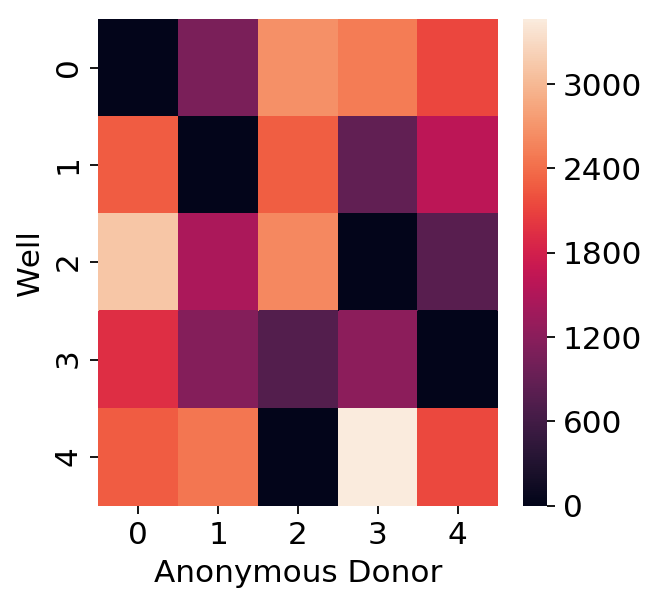

In [11]:
sns.heatmap(deconvolution);
plt.ylabel('Well')
plt.xlabel('Anonymous Donor');

That's amazing. It worked! Now to attach covariates to the donors and then stimulation conditions.

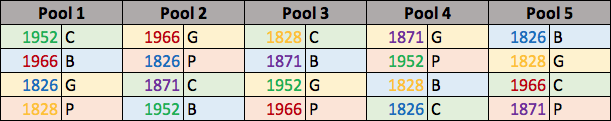

### Code for Mincheol

Mincheol asked for the single-cell data to validate some statements in his paper. Wants interferon beta vs control cells. Extracting the cell barcodes for those out now.

In [18]:
ind_match = {'1871': '0',
             '1828': '1',
             '1826': '3',
             '1966': '4',
             '1952': '2'
            }

In [19]:
betas = ['1966','1952','1871','1828','1826']
ctrls = ['1952','1871','1828','1826','1966']

In [20]:
pools = range(5)

In [21]:
beta_dict = dict()
for pool in pools:
    beta_dict[pool] = dict()
    df = wells[pool]['freemux'].sng()
    beta_ind = betas[pool]
    ctrl_ind = ctrls[pool]
    desc = 'beta: %s, ctrl: %s' % (beta_ind, ctrl_ind)
    beta_dict[pool]['beta'] = df.index[df['BEST.GUESS'] == ind_match[beta_ind]]
    beta_dict[pool]['ctrl'] = df.index[df['BEST.GUESS'] == ind_match[ctrl_ind]]
    beta_dict[pool]['desc'] = desc

In [25]:
beta_dict

{0: {'beta': Index(['CTACTTATCTGGAAGG-1', 'ACTTTCAGTGGATTTC-1', 'GATCGTAAGACGTCAG-1',
         'TTAGCGATCTGGGCGT-1', 'TTTGGCCCATATAGAG-1', 'TGTACAGGTCATCGTA-1',
         'GAACTTGAGAGCAGCT-1', 'TCAAGACGTCTGGTTA-1', 'GAAGTCTAGTGTCACT-1',
         'ATTGTCTTCGGGACAA-1',
         ...
         'CCTTAATCAACTCAAC-1', 'TCTATTGGTAGCGGTA-1', 'AATACGCGTATGGGTG-1',
         'AAGATAGTCGATTACG-1', 'TTCTAACTCTCTGCAC-1', 'CCTATTAGTGGAGTGT-1',
         'GCGGGTTGTTTCGTTT-1', 'CAGCCTTCATCCGTGG-1', 'TCCATCGAGCTTACCA-1',
         'CAATCCCCAGGATAGC-1'],
        dtype='object', name='BARCODE', length=2128),
  'ctrl': Index(['CTCAGAAAGCTGAAAT-1', 'AGTGCGCGTACGGTTT-1', 'ATATTCCGTAGCAGGT-1',
         'TCGGGACGTAACAATG-1', 'CGCGCAACATTCGTCC-1', 'TGGCGCATCGAGGTAG-1',
         'GCGAGAAAGGCAAGCT-1', 'TTAGCGATCGTGGGTC-1', 'GAAGTCTTCTTTCGAT-1',
         'GAAACAATCTGTTTAC-1',
         ...
         'TTGGTCCTCTTCTTCC-1', 'TTACGGACACACACCG-1', 'TGGACATCAAGGAAGA-1',
         'ATCCCTGTCCGCGATG-1', 'CTCTCAGAGTTCAACC-1', 'AAC

In [24]:
path = prefix + 'bcs/ifn-beta.dict.pkl'

with open(path,'wb') as file:
    pkl.dump(beta_dict,file)